In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("df_ff_factors_100325.csv")
df = df.drop(columns=["Unnamed: 0","crsp_portno"])
df = df.sort_values(by='date')

df_tech = pd.read_csv("df_ff_factors_techfunds.csv")
df_tech = df_tech.drop(columns=["Unnamed: 0","crsp_portno"])
df_tech = df_tech.sort_values(by='date')

In [6]:
# df['date'] = pd.to_datetime(df['date'])

# # Extract the year and month from the 'date' column
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month

# # Group by 'year' and 'month' and apply aggregation
# agg_df = df.groupby(['year', 'month']).agg(
#     min_value=('rolling_alpha_5f', 'min'),
#     median_value=('rolling_alpha_5f', 'median'),
#     max_value=('rolling_alpha_5f', 'max')
# ).reset_index()

# agg_df['year_month'] = agg_df['year'].astype(str) + '-' + agg_df['month'].astype(str).str.zfill(2)

# # Plotting the results
# plt.figure(figsize=(12, 6))
# plt.fill_between(agg_df['year_month'], agg_df['min_value'], agg_df['max_value'], color='red', alpha=0.3, label='Range (Min to Max)')
# plt.plot(agg_df['year_month'], agg_df['median_value'], label='Median', color='navy', linewidth=2)


# # Set labels and title
# plt.xlabel('Year')
# plt.ylabel('Value')
# plt.title('Monthly Min, Median, and Max values')

# # Create custom ticks for x-axis to show only the year
# ticks = []
# labels = []
# for i, row in agg_df.iterrows():
#     if row['month'] == 1:  # Only show ticks for January (or the first month of each year)
#         ticks.append(i)
#         labels.append(str(row['year']))

# plt.xticks(ticks=ticks, labels=labels, rotation=45)

# plt.legend()
# plt.tight_layout()
# plt.show()

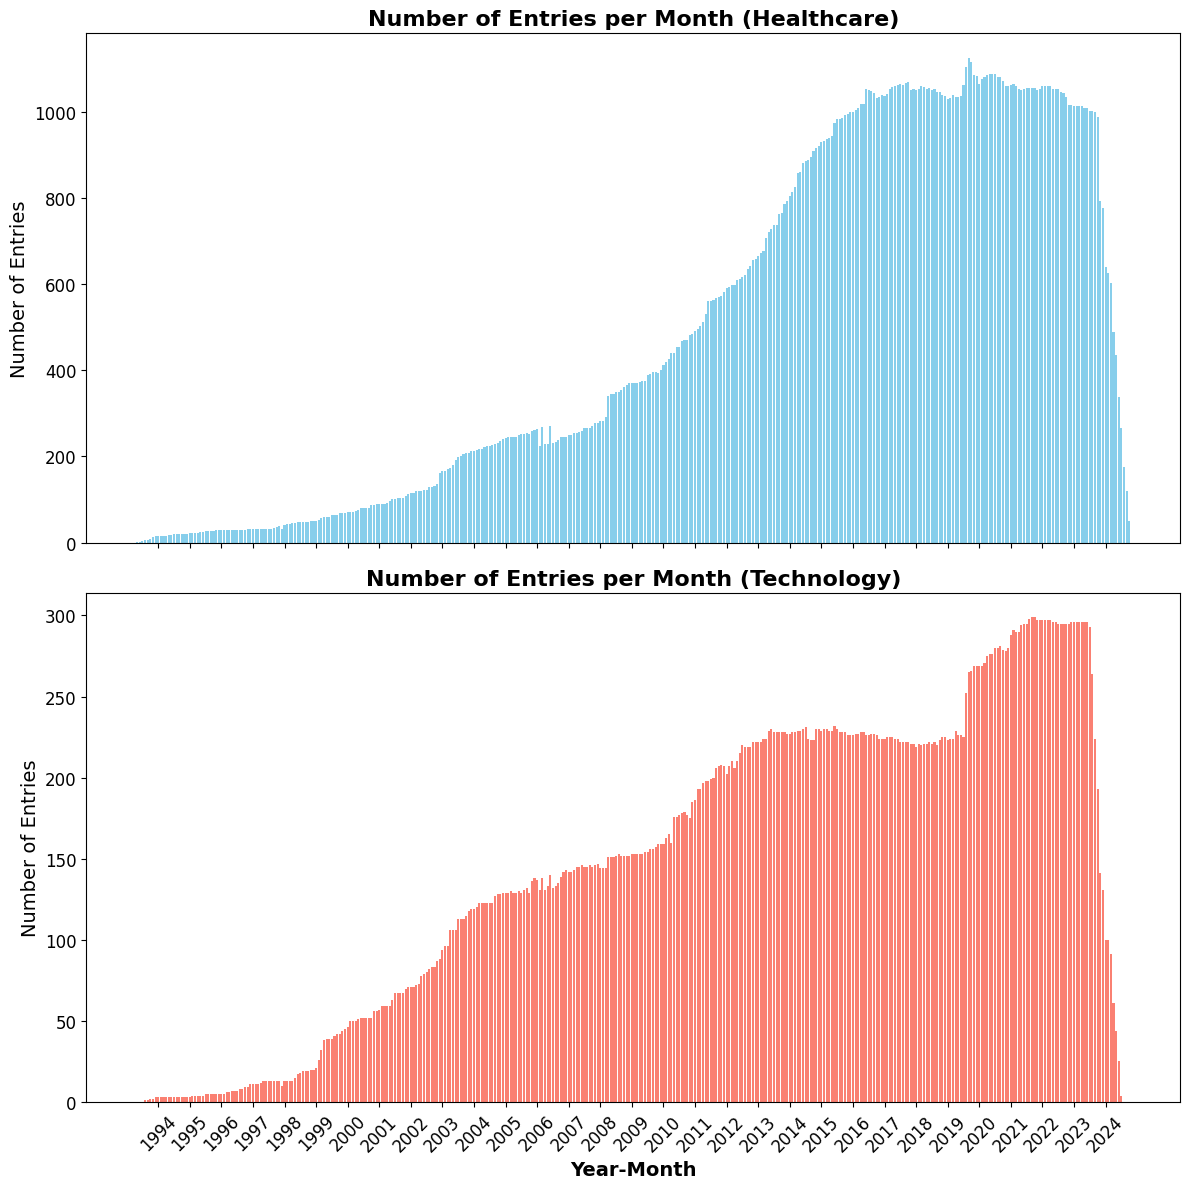

In [7]:
# ---- Process Healthcare Data ----
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
month_counts_healthcare = df.groupby(['year', 'month']).size().reset_index(name='count')
month_counts_healthcare['year_month'] = month_counts_healthcare['year'].astype(str) + '-' + month_counts_healthcare['month'].astype(str).str.zfill(2)

# ---- Process Tech Data ----
df_tech['date'] = pd.to_datetime(df_tech['date'])
df_tech['year'] = df_tech['date'].dt.year
df_tech['month'] = df_tech['date'].dt.month
month_counts_tech = df_tech.groupby(['year', 'month']).size().reset_index(name='count')
month_counts_tech['year_month'] = month_counts_tech['year'].astype(str) + '-' + month_counts_tech['month'].astype(str).str.zfill(2)

# ---- Create 2×1 Subplot ----
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# ---- Plot Healthcare ----
ax = axes[0]
ax.bar(month_counts_healthcare['year_month'], month_counts_healthcare['count'], color='skyblue')
ax.set_title('Number of Entries per Month (Healthcare)', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Entries', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# ---- Plot Tech ----
ax = axes[1]
ax.bar(month_counts_tech['year_month'], month_counts_tech['count'], color='salmon')
ax.set_title('Number of Entries per Month (Technology)', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Entries', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# ---- Set X-axis ticks (Only show years at January) ----
ticks = []
labels = []
for i, row in month_counts_healthcare.iterrows():
    if row['month'] == 1:  # Only show January labels
        ticks.append(i)
        labels.append(str(row['year']))

plt.xticks(ticks=ticks, labels=labels, rotation=45, fontsize=12)

# ---- Adjust Layout and Show ----
plt.xlabel('Year-Month', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

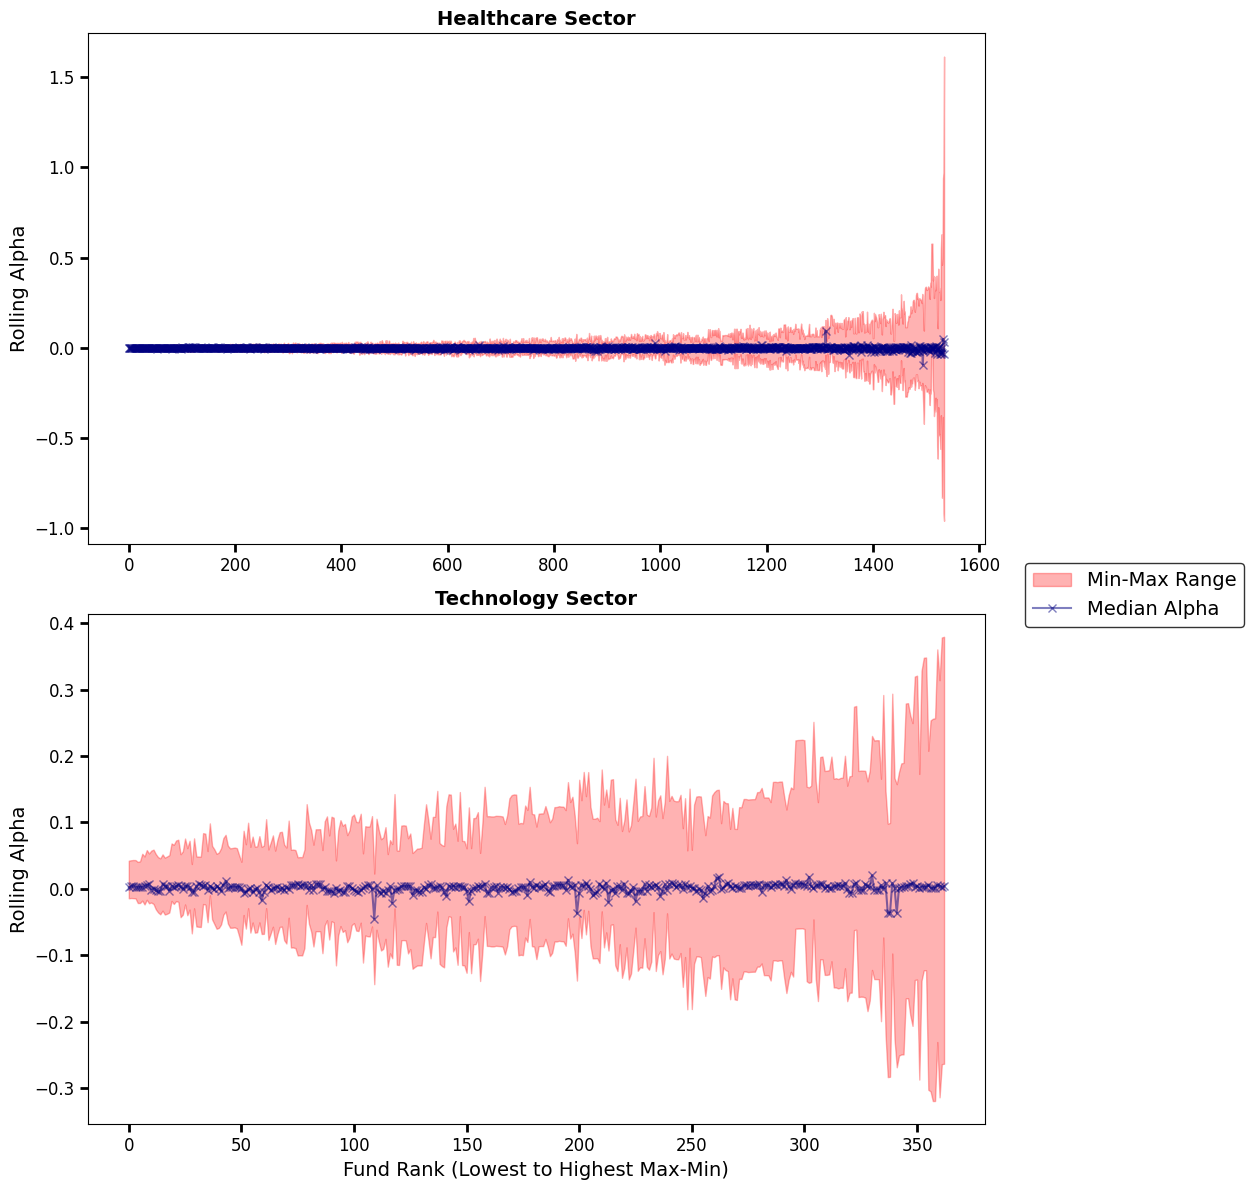

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# ---- Healthcare Sector ----
fund_stats_healthcare = df.groupby('crsp_fundno')['rolling_alpha_5f'].agg(['min', 'median', 'max'])
fund_stats_healthcare['range'] = fund_stats_healthcare['max'] - fund_stats_healthcare['min']
sorted_funds_healthcare = fund_stats_healthcare.sort_values('range').index
fund_rank_mapping_healthcare = {fund: rank for rank, fund in enumerate(sorted_funds_healthcare)}
df['fund_rank'] = df['crsp_fundno'].map(fund_rank_mapping_healthcare)

ax = axes[0]
ax.fill_between(range(len(sorted_funds_healthcare)), fund_stats_healthcare.loc[sorted_funds_healthcare, 'min'], 
                fund_stats_healthcare.loc[sorted_funds_healthcare, 'max'], color='red', alpha=0.3, label='Min-Max Range')
ax.plot(range(len(sorted_funds_healthcare)), fund_stats_healthcare.loc[sorted_funds_healthcare, 'median'], 
        color='navy', marker='x', linestyle='-', label='Median Alpha', alpha=0.5)

ax.set_title('Healthcare Sector',fontweight = 'bold', fontsize =14)
ax.set_ylabel('Rolling Alpha', fontsize =14)
ax.tick_params(axis='both', labelsize=12, width=2, length=6)

# ---- Tech Sector ----
fund_stats_tech = df_tech.groupby('crsp_fundno')['rolling_alpha_5f'].agg(['min', 'median', 'max'])
fund_stats_tech['range'] = fund_stats_tech['max'] - fund_stats_tech['min']
sorted_funds_tech = fund_stats_tech.sort_values('range').index
fund_rank_mapping_tech = {fund: rank for rank, fund in enumerate(sorted_funds_tech)}
df_tech['fund_rank'] = df_tech['crsp_fundno'].map(fund_rank_mapping_tech)

ax = axes[1]
ax.fill_between(range(len(sorted_funds_tech)), fund_stats_tech.loc[sorted_funds_tech, 'min'], 
                fund_stats_tech.loc[sorted_funds_tech, 'max'], color='red', alpha=0.3, label='Min-Max Range')
ax.plot(range(len(sorted_funds_tech)), fund_stats_tech.loc[sorted_funds_tech, 'median'], 
        color='navy', marker='x', linestyle='-', label='Median Alpha', alpha=0.5)

ax.set_title('Technology Sector',fontweight = 'bold', fontsize =14)
ax.set_xlabel('Fund Rank (Lowest to Highest Max-Min)', fontsize =14)
ax.set_ylabel('Rolling Alpha', fontsize =14)
ax.tick_params(axis='both', labelsize=12, width=2, length=6)

# ---- Common Legend ----
handles, labels = axes[0].get_legend_handles_labels()  # Get legend from first subplot
legend = fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), fontsize=14, frameon=True)  # Place on right side
legend.get_frame().set_edgecolor('black')
legend.set_visible(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()